In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df_titles = pd.read_csv("titles_filtrado.csv")

df_titles.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5850 non-null   int64  
 1   id                    5850 non-null   object 
 2   title                 5849 non-null   object 
 3   type                  5850 non-null   object 
 4   description           5832 non-null   object 
 5   release_year          5850 non-null   int64  
 6   age_certification     3231 non-null   object 
 7   runtime               5850 non-null   int64  
 8   genres                5850 non-null   object 
 9   production_countries  5850 non-null   object 
 10  seasons               2106 non-null   float64
 11  imdb_id               5447 non-null   object 
 12  imdb_score            5850 non-null   float64
 13  imdb_votes            5352 non-null   float64
 14  tmdb_popularity       5759 non-null   float64
 15  tmdb_score           

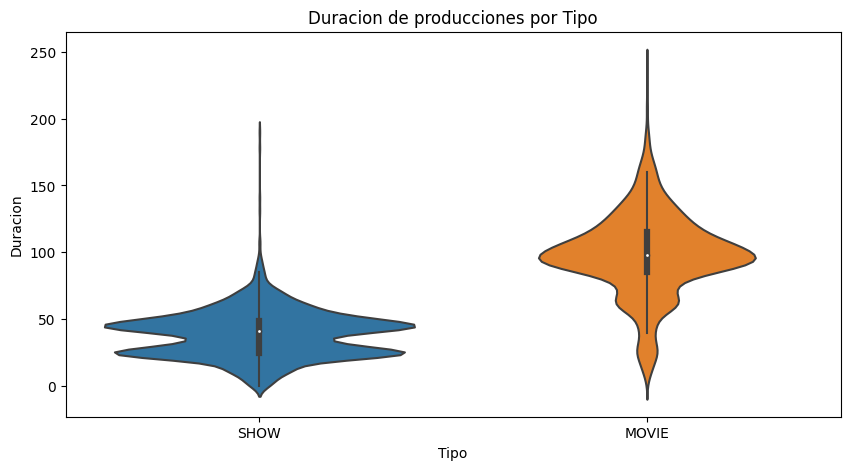

In [7]:
#Analisis de Tipo vs Duracion

plt.figure(figsize=(10, 5))

plot = sns.violinplot(x=df_titles['type'], y=df_titles['runtime'])

plot.set_title('Duracion de producciones por Tipo')
plot.set_ylabel('Duracion')
plot.set_xlabel('Tipo')

plt.show()


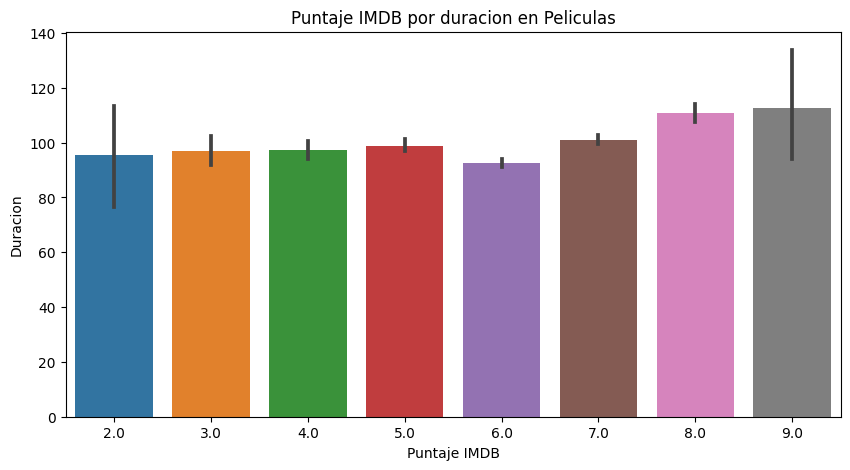

In [9]:
#Analisis de Puntaje imdb vs duracion en peliculas


puntajes = df_titles.round({'imdb_score': 0, 'tmdb_score':0})

peliculas = puntajes[puntajes['type'] =='MOVIE']

plt.figure(figsize=(10, 5))

plot = sns.barplot(x='imdb_score', y='runtime', data=peliculas)

plot.set_title('Puntaje IMDB por duracion en Peliculas')
plot.set_ylabel('Duracion')
plot.set_xlabel('Puntaje IMDB')

plt.show()


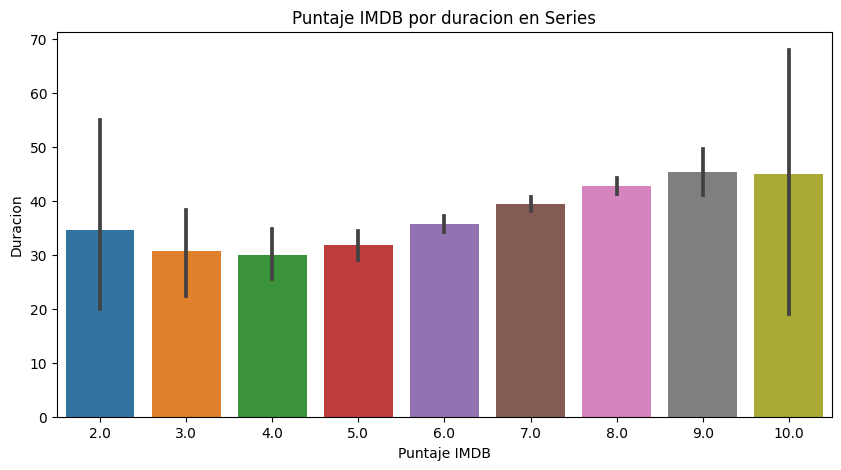

In [10]:
#Analisis de Puntaje imdb vs duracion en series

series = puntajes[puntajes['type'] =='SHOW']

plt.figure(figsize=(10, 5))

plot = sns.barplot(x='imdb_score', y='runtime', data=series)

plot.set_title('Puntaje IMDB por duracion en Series')
plot.set_ylabel('Duracion')
plot.set_xlabel('Puntaje IMDB')

plt.show()

De las duraciones de las peliculas y series vs su puntuacion, podriamos decir que:

En el caso de las peliculas, las mejor puntuadas poseen una duracion mayor mientras que las peliculas cortas suelen tener puntuaciones inferiores.

Por otro lado, en las series, es mas marcado que las que poseen capitulos mas largos poseen mejor puntuacion, aunque se aprecian ciertas excepciones.

In [11]:
#Analisis de certificacion por año.

#Me fijo con un describe, de que año son la mayoria de las producciones propuestas 

producciones = df_titles
producciones['release_year'] = producciones['release_year'].astype(int)
producciones.describe()


,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,5850.000000,2106.000000,5850.000000,5.352000e+03,5759.000000,5850.000000
mean,2924.500000,2016.417094,76.888889,2.162868,6.509966,2.343938e+04,22.637925,6.827573
std,1688.893869,6.937726,39.002509,2.689041,1.114846,9.582047e+04,81.680263,1.139020
min,0.000000,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,1462.250000,2016.000000,44.000000,1.000000,5.900000,5.167500e+02,2.728500,6.200000
50%,2924.500000,2018.000000,83.000000,1.000000,6.500000,2.233500e+03,6.821000,6.800000
75%,4386.750000,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.500000
max,5849.000000,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


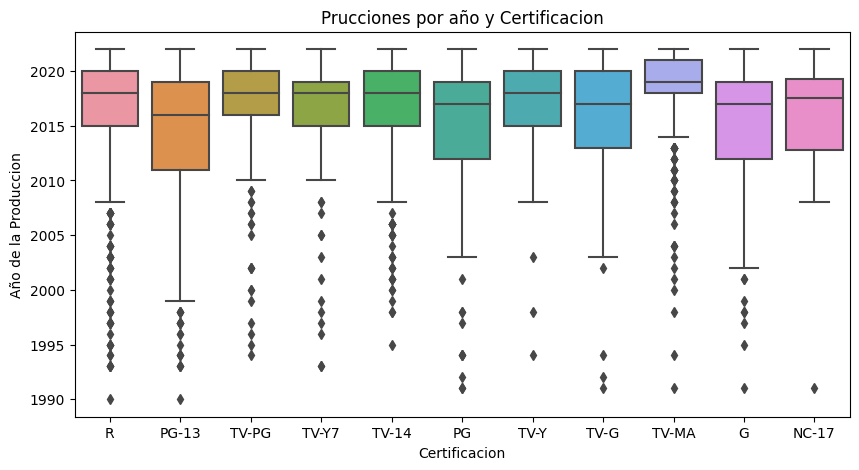

In [12]:
#Debido a que el 75% de las producciones son luego de 2016, extenderse demasiado en la fecha es innecesario.
#Es por eso que tomo luego de 1990

producciones = producciones[producciones['release_year'] >= 1990]

plt.figure(figsize=(10, 5))

plot = sns.boxplot(x=producciones['age_certification'], y=producciones['release_year'])

plot.set_title('Prucciones por año y Certificacion')
plot.set_ylabel('Año de la Produccion')
plot.set_xlabel('Certificacion')

plt.show()



En el ultimo puede verse que en el ultimo tiempo hubo un incremento significativo en la creacion de contenido TV-MA dirigido a publico maduro, mientras que las PG-13 para mayores de 13 años tuvieron su apogeo luego del 2010.